# Catalog Earthquakes seismology with DAS

#### Todo List:
1. Reference earthquakes by Evid rather than dataframe index
2. Make a map of all of the detected events
3. Try some xcorr

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pandas as pd


# Loading data

In [2]:
#putting together all dataframes
df = pd.read_csv('allearthquakesonefile.csv')
dff11clip = pd.read_csv('Catalogwhidbeyclipped.csv')

# Concat dataframes

In [3]:
df.head()

,Magnitud,id_event,Location,detect_seismO,detect_das,clipped,channels,PGA,PGM,PGV,df0=pd.read_csv('Catalogo600km3to5mw.csv')
0,1.64,uw61901506,47.502714,NaN,FALSE,False,NaN,NaN,NaN,NaN,df0
1,1.55,uw61901421,40.381816,NaN,TRUE,False,NaN,NaN,NaN,NaN,df=pd.read_csv('Catalog-Whidbey-27to3.csv')
2,1.54,uw61901381,35.989439,NaN,FALSE,False,NaN,NaN,NaN,NaN,#df
3,1.42,uw61901286,50.867473,NaN,FALSE,False,NaN,NaN,NaN,NaN,dff1=pd.read_csv('Catalogwhidbey24to27.csv')
4,1.43,uw61900971,75.110523,NaN,FALSE,False,NaN,NaN,NaN,NaN,dff1


# dropping duplicates

In [4]:
cleandata_2 = df.drop_duplicates()

cleandata_2

,Magnitud,id_event,Location,detect_seismO,detect_das,clipped,channels,PGA,PGM,PGV,df0=pd.read_csv('Catalogo600km3to5mw.csv')
0,1.64,uw61901506,47.502714,NaN,FALSE,False,NaN,NaN,NaN,NaN,df0
1,1.55,uw61901421,40.381816,NaN,TRUE,False,NaN,NaN,NaN,NaN,df=pd.read_csv('Catalog-Whidbey-27to3.csv')
2,1.54,uw61901381,35.989439,NaN,FALSE,False,NaN,NaN,NaN,NaN,#df
3,1.42,uw61901286,50.867473,NaN,FALSE,False,NaN,NaN,NaN,NaN,dff1=pd.read_csv('Catalogwhidbey24to27.csv')
4,1.43,uw61900971,75.110523,NaN,FALSE,False,NaN,NaN,NaN,NaN,dff1
...,...,...,...,...,...,...,...,...,...,...,...
799,5.20,us7000irbr,606.808105,NaN,TRUE,True,NaN,NaN,NaN,NaN,NaN
800,5.60,us7000hhik,695.303477,NaN,norecord,False,NaN,NaN,NaN,NaN,NaN
801,5.10,us7000hf29,790.117236,NaN,TRUE,False,NaN,NaN,NaN,NaN,NaN
802,5.30,us6000hfx7,623.530865,NaN,norecord,False,NaN,NaN,NaN,NaN,NaN


# Sellect data to plot

In [5]:
sele_rowcleandata = cleandata_2[cleandata_2.detect_das =='TRUE']
nosele_rowcleandata = cleandata_2[cleandata_2.detect_das =='FALSE']
inconclu_data = cleandata_2[cleandata_2.detect_das == 'INCONCLUSIVE']


In [6]:
#sanity check
#nosele_rowcleandata
#inconclu_data
#clipped_data
#inconclu_data
cleandata_2.clipped


0      False
1      False
2      False
3      False
4      False
       ...  
799     True
800    False
801    False
802    False
803    False
Name: clipped, Length: 804, dtype: bool

# Plotting data selected

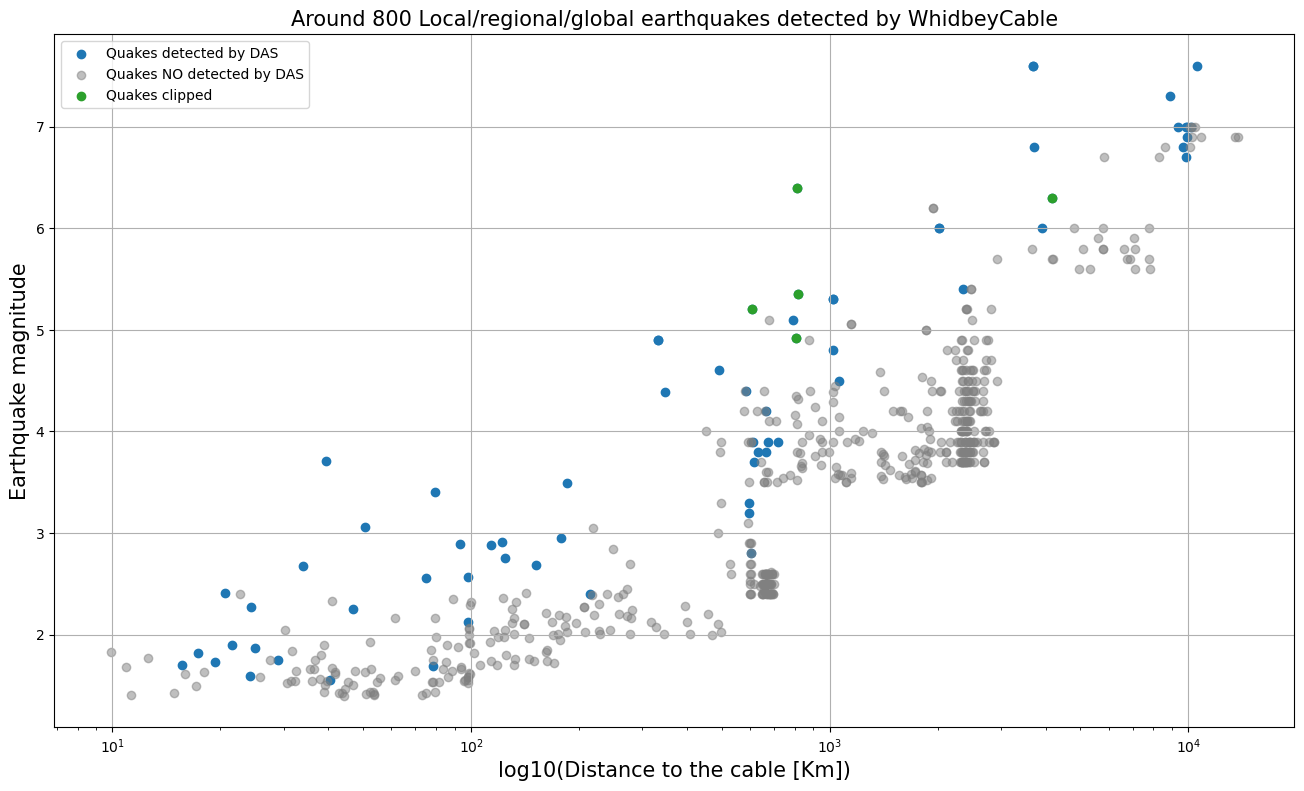

In [7]:
fig,ax=plt.subplots(figsize=(16,9))
a=0.5
ax=plt.scatter(sele_rowcleandata.Location, sele_rowcleandata.Magnitud,c='C0', s=None, marker='o',label='Quakes detected by DAS')
ax=plt.scatter(nosele_rowcleandata.Location, nosele_rowcleandata.Magnitud,c='gray', s=None, marker='o',label='Quakes NO detected by DAS',alpha=0.5)
#ax=plt.scatter(inconclu_data.Location, inconclu_data.Magnitud,c='C11', s=None, marker='o', label='Inconclusive Quakes')
ax=plt.scatter(dff11clip.Location, dff11clip.Magnitud,c='C2', s=None, marker='o',label='Quakes clipped')
ax=plt.xscale('log')
ax=plt.ylabel('Earthquake magnitude', fontsize=15);
ax=plt.xlabel('log10(Distance to the cable [Km])',fontsize=15)
ax=plt.grid()
ax=plt.title('Around 800 Local/regional/global earthquakes detected by WhidbeyCable',fontsize=15)
ax =plt.savefig("whidbeylocalquakesmw-all")
ax = plt.legend()
ax = plt.show()
ax = plt.close()

Clipped analisis


In [8]:
#the folder that contains these files is "someclippedearthquakes"
clip = pd.read_csv('Clippedanalisis.csv')
clip

,Magnitud,id_event,Location,detect_seismO,detect_das,clipped,channels,PGA,PGM,PGV
0,5.35,nc73827571,815.823922,NaN,TRUE,True,NaN,8.61E-05,3.35E-07,3.82E-06
1,4.92,nc73821046,806.386428,NaN,TRUE,True,NaN,2.33E-05,3.67E-08,5.36E-07
2,4.90,us6000j8c6,877.203601,NaN,FALSE,False,NaN,8.15E-06,1.05E-08,1.47E-07
3,5.20,us7000irbr,606.808105,NaN,TRUE,True,NaN,1.00E-04,2.14E-07,3.43E-06
4,5.60,us7000hhik,695.303477,NaN,norecord,False,NaN,norecord,norecord,norecord
5,5.10,us7000hf29,790.117236,NaN,TRUE,False,NaN,7.11E-06,2.24E-08,2.47E-07
6,5.30,us6000hfx7,623.530865,NaN,norecord,False,NaN,norecord,norecord,norecord
7,5.10,us7000gxl1,677.999050,NaN,TRUE,False,NaN,7.87E-05,1.29E-07,2.13E-06
8,6.40,nc73821036,809.854647,NaN,TRUE,True,NaN,2.83E-04,1.80E-06,1.85E-05
9,6.30,us6000j985,4174.163509,NaN,TRUE,True,NaN,1.09E-05,4.91E-08,6.75E-07
